# <font color=Purple>ALGORITMO REFERENTE A AV1 - HEITOR TEIXEIRA 2220276

        SISTEMAS INTELIGENTES

# <font color=ORANGE>Biblioteca, dados e análise. Geral para todos os métodos

## <font color=blue>Importanto bibliotecas

In [1]:
# cáculo
import numpy as np

# organização e análise de dados
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
import seaborn as sns
from scipy.stats import norm

c:\Users\heito\anaconda3\envs\base-copia\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## <font color = blue>Importanto dados e armazenando em dataframes do pandas

In [2]:
# importando dados e juntando os db em um sõ dataframe
db_caracteristicas = pd.read_csv("EMG.csv", header=None, names=['x1', 'x2'])
db_rotulos = pd.read_csv("Rotulos.csv", header=None, names=['neutro', 'sorriso', 'aberto', 'surpreso', 'grumpy'])
dados = pd.concat([db_caracteristicas, db_rotulos], axis=1)

# adicionando uma coluna de rótulo textual
dados['rotulo'] = dados.loc[:, ['neutro', 'sorriso', 'aberto', 'surpreso', 'grumpy']].idxmax(axis=1)

# definindo entradas e saídas
inputs = dados.loc[:, ['x1', 'x2']].values
outputs = dados.loc[:, ['neutro', 'sorriso', 'aberto', 'surpreso', 'grumpy']].values

# cores e rótulos pra se usar em todo o código
cores = ['red', 'blue', 'green', 'purple', 'orange']
rotulos = ['neutro', 'sorriso', 'aberto', 'surpreso', 'grumpy']


## <font color=blue> Gráficos para visuialização e interpretação dos dados

#### <font color = red> Scatter

In [3]:
fig = px.scatter(dados, x='x1', y='x2', color='rotulo', title='Características x1 e x2',
                 labels={'x1': 'x1', 'x2': 'x2'},
                 color_discrete_sequence=cores)

fig.update_layout(height=800)

fig.show()


#### <font color = red> Boxplot

In [4]:
fig_box = go.Figure()

for i, rotulo in enumerate(rotulos):
    fig_box.add_trace(go.Box(y=dados[dados['rotulo'] == rotulo]['x1'], name=rotulo, marker_color=cores[i]))

fig_box.update_layout(title="Box Plot: Característica x1", height=800)
fig_box.show()


In [5]:
# agrupar os dados por rótulo para calcular os quartis individuais de cada classe.
for rotulo, agrupados_rotulo in dados.groupby('rotulo'):
    q1 = agrupados_rotulo['x1'].quantile(0.25)
    q2 = agrupados_rotulo['x1'].quantile(0.5)
    q3 = agrupados_rotulo['x1'].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    count_inf_q1 = agrupados_rotulo[(agrupados_rotulo['x1'] >= limite_inferior) & (agrupados_rotulo['x1'] <= q1)].shape[0]
    count_q1_q2 = agrupados_rotulo[(agrupados_rotulo['x1'] > q1) & (agrupados_rotulo['x1'] <= q2)].shape[0]
    count_q2_q3 = agrupados_rotulo[(agrupados_rotulo['x1'] > q2) & (agrupados_rotulo['x1'] <= q3)].shape[0]
    count_q3_sup = agrupados_rotulo[(agrupados_rotulo['x1'] > q3) & (agrupados_rotulo['x1'] <= limite_superior)].shape[0]
    outliers = agrupados_rotulo[(agrupados_rotulo['x1'] < limite_inferior) | (agrupados_rotulo['x1'] > limite_superior)]

    print(f"\033[32m{rotulo}:")
    print(f"  \033[33mLimite inferior:\033[0m {limite_inferior}")
    print(f"  \033[33mQ1:\033[0m {q1}")
    print(f"  \033[33mQ2 (mediana):\033[0m {q2}")
    print(f"  \033[33mQ3:\033[0m {q3}")
    print(f"  \033[33mLimite superior:\033[0m {limite_superior}")
    print(f"  \033[33mNúmero de pontos no intervalo [limite inferior, Q1]:\033[0m {count_inf_q1}")
    print(f"  \033[33mNúmero de pontos no intervalo (Q1, Q2]:\033[0m {count_q1_q2}")
    print(f"  \033[33mNúmero de pontos no intervalo (Q2, Q3]:\033[0m {count_q2_q3}")
    print(f"  \033[33mNúmero de pontos no intervalo (Q3, limite superior]:\033[0m {count_q3_sup}")
    print(f"  \033[33mOutliers:\033[0m {outliers.shape}\n")


aberto:
  Limite inferior: 340.0
  Q1: 721.0
  Q2 (mediana): 834.0
  Q3: 975.0
  Limite superior: 1356.0
  Número de pontos no intervalo [limite inferior, Q1]: 2504
  Número de pontos no intervalo (Q1, Q2]: 2502
  Número de pontos no intervalo (Q2, Q3]: 2495
  Número de pontos no intervalo (Q3, limite superior]: 2437
  Outliers: (62, 8)

grumpy:
  Limite inferior: 974.0
  Q1: 1718.0
  Q2 (mediana): 1973.0
  Q3: 2214.0
  Limite superior: 2958.0
  Número de pontos no intervalo [limite inferior, Q1]: 2504
  Número de pontos no intervalo (Q1, Q2]: 2498
  Número de pontos no intervalo (Q2, Q3]: 2500
  Número de pontos no intervalo (Q3, limite superior]: 2414
  Outliers: (84, 8)

neutro:
  Limite inferior: -10.5
  Q1: 0.0
  Q2 (mediana): 0.0
  Q3: 7.0
  Limite superior: 17.5
  Número de pontos no intervalo [limite inferior, Q1]: 7299
  Número de pontos no intervalo (Q1, Q2]: 0
  Número de pontos no intervalo (Q2, Q3]: 202
  Número de pontos no intervalo (Q3, limite superior]: 370
  Outliers:

# <font color=ORANGE>OLS / OLS regularizada

## <font color=blue> Regressão linear dos quadrados ordinários

#### <font color=red> Classe OLS

In [6]:
class OLS:
    def __init__(self, inputs, outputs, lambda_, sem_uns=False):
        self.inputs = inputs
        self.outputs = outputs
        self.lambda_ = lambda_
        self.sem_uns = sem_uns
        # assim que criamos a classe já treina automaticamente.
        # argumento sem_uns opcional parar treinar sem bias
        self.coef, self.bias = self.treinar()

    def treinar(self):
        inputs = self.inputs
        outputs = self.outputs
        lambda_ = self.lambda_
        sem_uns = self.sem_uns
        
        if not sem_uns:
            # coluna de 1s para bias
            X = np.c_[np.ones((inputs.shape[0], 1)), inputs]
        else:
            X = inputs
        
        # lambda para ser usado na regularizada
        termo_regularizacao = np.eye(X.shape[1]) * lambda_
        if not sem_uns:
            termo_regularizacao[0, 0] = 0  # não aplicar no bias
        
        # treino
        treino = np.linalg.pinv(X.T @ X + termo_regularizacao) @ X.T @ outputs
        
        if not sem_uns:
            bias = treino[0]
            coef = treino[1:]
        else:
            coef = treino
            n_classes = outputs.shape[1]
            bias = np.zeros((n_classes, 1))
        
        return coef, bias


    def previsao(self, inputs):
        previsoes = inputs @ self.coef + self.bias.T
        previsoes_bin = np.where(previsoes == np.max(previsoes, axis=1, keepdims=True), 1, -1) # utilizei mesma nomeclatura do prof
        return previsoes_bin

    def acuracia(self, previsoes, outputs):
        acertos = np.sum(np.all(previsoes == outputs, axis=1))
        acuracia = acertos / outputs.shape[0]
        return acuracia * 100

    def matriz_de_confusao(self, previsoes_bin, outputs):
        previsoes = np.argmax(previsoes_bin, axis=1)
        rotulos_verdadeiros = np.argmax(outputs, axis=1)
        matriz_confusao = confusion_matrix(rotulos_verdadeiros, previsoes)
        plt.figure(figsize=(8, 5))
        legendas = ['neutro', 'sorriso', 'aberto', 'surpreso', 'grumpy']
        sns.heatmap(matriz_confusao / matriz_confusao.sum(axis=1)[:, np.newaxis], annot=True, fmt='.2f', cmap='inferno', vmin=0, vmax=1, xticklabels=legendas, yticklabels=legendas)
        plt.xlabel('Previsão')
        plt.ylabel('Real')


#### <font color=red> Treino e resultado

In [7]:
resultados = pd.DataFrame(columns=['Acurácia treino', 'Acurácia teste'])
lambdas = [0]

for i in range(100):
    # Sem definir seed para todos os resultados serem diferentes
    inputs_treino, inputs_teste, outputs_treino, outputs_teste = train_test_split(inputs, outputs, test_size=0.2)
    
    modelo = OLS(inputs_treino, outputs_treino, lambdas)

    previsoes_treino = modelo.previsao(inputs_treino)
    previsoes_teste = modelo.previsao(inputs_teste)

    acuracia_treino = modelo.acuracia(previsoes_treino, outputs_treino)
    acuracia_teste = modelo.acuracia(previsoes_teste, outputs_teste)
    
    resultados = pd.concat([resultados, pd.DataFrame({'Acurácia treino': [acuracia_treino], 'Acurácia teste': [acuracia_teste]})], ignore_index=True)

resultados.style.highlight_max(subset=['Acurácia treino', 'Acurácia teste'], color='blue', axis=0)

,Acurácia treino,Acurácia teste
0,72.367500,72.290000
1,72.765000,72.310000
2,72.215000,71.630000
3,72.735000,72.890000
4,71.947500,71.730000
5,72.725000,72.410000
6,72.690000,73.040000
7,72.335000,72.800000
8,72.325000,72.730000
9,72.757500,73.020000


In [8]:
media_treino = resultados['Acurácia treino'].mean()
desvio_padrao_treino = resultados['Acurácia treino'].std()
maior_acuracia_treino = resultados['Acurácia treino'].max()
menor_acuracia_treino = resultados['Acurácia treino'].min()

media_teste = resultados['Acurácia teste'].mean()
desvio_padrao_teste = resultados['Acurácia teste'].std()
maior_acuracia_teste = resultados['Acurácia teste'].max()
menor_acuracia_teste = resultados['Acurácia teste'].min()

print(f'Acurácia treino - Média: {media_treino:.2f}%, Desvio padrão: {desvio_padrao_treino:.2f}%, Maior: {maior_acuracia_treino:.2f}%, Menor: {menor_acuracia_treino:.2f}%')
print(f'Acurácia teste - Média: {media_teste:.2f}%, Desvio padrão: {desvio_padrao_teste:.2f}%, Maior: {maior_acuracia_teste:.2f}%, Menor: {menor_acuracia_teste:.2f}%')


Acurácia treino - Média: 72.35%, Desvio padrão: 0.35%, Maior: 73.20%, Menor: 71.46%
Acurácia teste - Média: 72.25%, Desvio padrão: 0.56%, Maior: 73.66%, Menor: 70.77%


In [9]:
resultados_regularizados = pd.DataFrame(columns=['Lambda', 'Acurácia treino', 'Acurácia teste'])
inputs_treino, inputs_teste, outputs_treino, outputs_teste = train_test_split(inputs, outputs, test_size=0.2)
lambdas = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9, 1]

for lambda_ in lambdas:
    
    modelo = OLS(inputs_treino, outputs_treino, lambda_)

    previsoes_treino = modelo.previsao(inputs_treino)
    previsoes_teste = modelo.previsao(inputs_teste)

    acuracia_treino = modelo.acuracia(previsoes_treino, outputs_treino)
    acuracia_teste = modelo.acuracia(previsoes_teste, outputs_teste)
    
    resultados_regularizados = pd.concat([resultados_regularizados, pd.DataFrame({'Lambda': [lambda_], 'Acurácia treino': [acuracia_treino], 'Acurácia teste': [acuracia_teste]})], ignore_index=True)

resultados_regularizados.style.highlight_max(subset=['Acurácia treino', 'Acurácia teste'], color='blue', axis=0)

,Lambda,Acurácia treino,Acurácia teste
0,0,71.757500,71.590000
1,0.100000,71.757500,71.590000
2,0.200000,71.757500,71.590000
3,0.300000,71.757500,71.590000
4,0.400000,71.757500,71.590000
5,0.500000,71.757500,71.590000
6,0.600000,71.757500,71.590000
7,0.700000,71.757500,71.590000
8,0.900000,71.757500,71.590000
9,1,71.757500,71.590000


In [10]:
media_treino = resultados_regularizados['Acurácia treino'].mean()
desvio_padrao_treino = resultados_regularizados['Acurácia treino'].std()
maior_acuracia_treino = resultados_regularizados['Acurácia treino'].max()
menor_acuracia_treino = resultados_regularizados['Acurácia treino'].min()

media_teste = resultados_regularizados['Acurácia teste'].mean()
desvio_padrao_teste = resultados_regularizados['Acurácia teste'].std()
maior_acuracia_teste = resultados_regularizados['Acurácia teste'].max()
menor_acuracia_teste = resultados_regularizados['Acurácia teste'].min()

print(f'Acurácia treino - Média: {media_treino:.2f}%, Desvio padrão: {desvio_padrao_treino:.2f}%, Maior: {maior_acuracia_treino:.2f}%, Menor: {menor_acuracia_treino:.2f}%')
print(f'Acurácia teste - Média: {media_teste:.2f}%, Desvio padrão: {desvio_padrao_teste:.2f}%, Maior: {maior_acuracia_teste:.2f}%, Menor: {menor_acuracia_teste:.2f}%')

Acurácia treino - Média: 71.76%, Desvio padrão: 0.00%, Maior: 71.76%, Menor: 71.76%
Acurácia teste - Média: 71.59%, Desvio padrão: 0.00%, Maior: 71.59%, Menor: 71.59%


In [11]:
resultados_regularizados = pd.DataFrame(columns=['Lambda', 'Acurácia treino', 'Acurácia teste'])

lambdas = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9, 1]

for lambda_ in lambdas:
    
    inputs_treino, inputs_teste, outputs_treino, outputs_teste = train_test_split(inputs, outputs, test_size=0.2)
    
    modelo = OLS(inputs_treino, outputs_treino, lambda_)

    previsoes_treino = modelo.previsao(inputs_treino)
    previsoes_teste = modelo.previsao(inputs_teste)

    acuracia_treino = modelo.acuracia(previsoes_treino, outputs_treino)
    acuracia_teste = modelo.acuracia(previsoes_teste, outputs_teste)
    
    resultados_regularizados = pd.concat([resultados_regularizados, pd.DataFrame({'Lambda': [lambda_], 'Acurácia treino': [acuracia_treino], 'Acurácia teste': [acuracia_teste]})], ignore_index=True)

resultados_regularizados.style.highlight_max(subset=['Acurácia treino', 'Acurácia teste'], color='blue', axis=0)

,Lambda,Acurácia treino,Acurácia teste
0,0,72.175000,72.410000
1,0.100000,72.257500,71.770000
2,0.200000,71.665000,71.580000
3,0.300000,72.042500,72.480000
4,0.400000,72.597500,72.430000
5,0.500000,72.932500,72.560000
6,0.600000,72.927500,73.110000
7,0.700000,72.447500,72.230000
8,0.900000,72.975000,72.940000
9,1,71.772500,71.690000


## <font color=blue> Gráficos para visuialização de resultados

### <font color=red> scatter 2d com planos

C:\Users\heito\AppData\Local\Temp\ipykernel_20228\3152476092.py:20: UserWarning:

No contour levels were found within the data range.



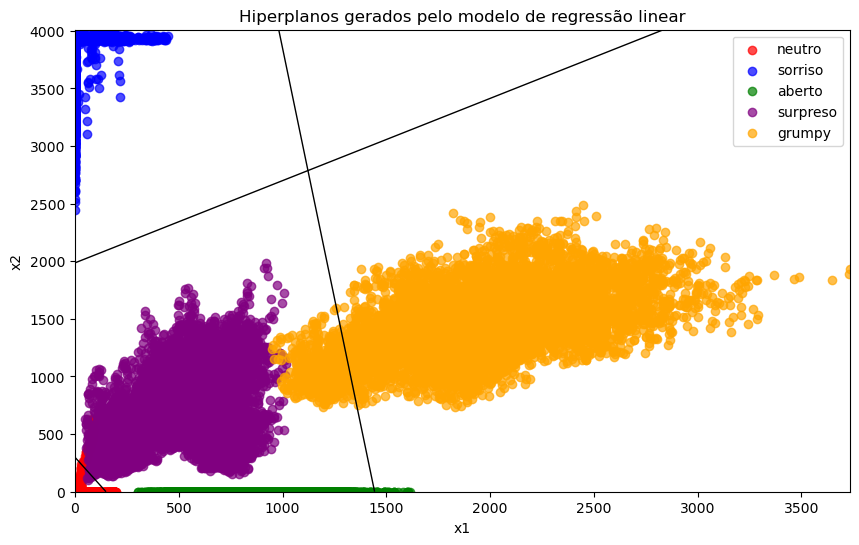

In [12]:
x1_range = np.linspace(inputs[:, 0].min() - 1, inputs[:, 0].max() + 1, 100)
x2_range = np.linspace(inputs[:, 1].min() - 1, inputs[:, 1].max() + 1, 100)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

coeficientes = modelo.coef.T
bias = modelo.bias.T

hiperplanos = np.empty((len(x1_range), len(x2_range), coeficientes.shape[0]))
for i in range(coeficientes.shape[0]):
    hiperplanos[:, :, i] = coeficientes[i, 0] * x1_mesh + coeficientes[i, 1] * x2_mesh + bias[i]

rotulos = ['neutro', 'sorriso', 'aberto', 'surpreso', 'grumpy']

plt.figure(figsize=(10, 6))

for i, rotulo in enumerate(rotulos):
    plt.scatter(inputs[outputs[:, i] == 1, 0], inputs[outputs[:, i] == 1, 1], c=cores[i], label=rotulo, alpha=0.7)

for i in range(coeficientes.shape[0]):
    plt.contour(x1_mesh, x2_mesh, hiperplanos[:, :, i], levels=[0], colors='black', linewidths=1)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Hiperplanos gerados pelo modelo de regressão linear')
plt.legend()
plt.show()


### <font color=red> Matriz de confusão

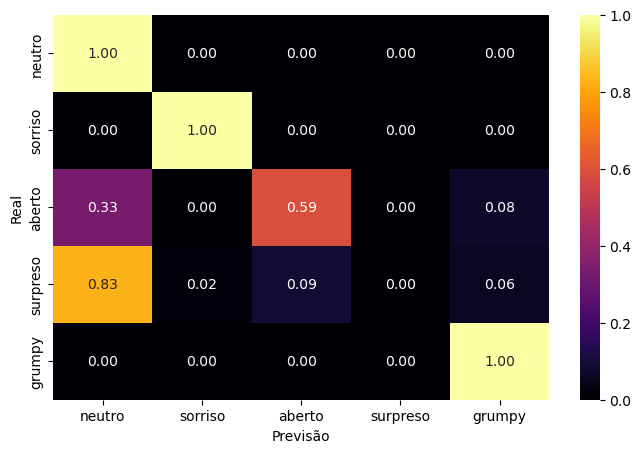

In [13]:
modelo.matriz_de_confusao(previsoes_teste, outputs_teste)

## <font color=blue>Questões

<font color = red>1.<font color = grey> Faça a implementação do método dos mínimos quadrados ordinário.

<font color = green>check

<font color = red>2.<font color = grey> Faça a implementação do método dos mínimos quadrados regularizado.

<font color = green>check

     • Faça o treinamento do modelo utilizando valores de λ = {0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9, 1}
<font color = green>  check

     • Pergunta: O que significa λ = 0?
<font color = green> Lambda = 0 significa simplesmente não utilizar lambda, ou seja, o método ols simples. tanto que usei a mesma função pra treinar os dois modelos. Porém, no OLS regularizado modifiquei o lambda com valores pedidos em um vetor vetor de lambdas.

<font color = red>3.<font color = grey> Em sala foi realizada uma discussão sobre a adição de um vetor coluna de 1s no início da matriz
de dados X.

    • O que implicaria adicionar este vetor coluna para o presente trabalho?
<font color = green> Adicionar o vetor de 1s significa dar um valor indenpente para y caso todos os x seja 0. o vetor de 1s serve para adicionar o c da equação da reta -> y = ax + c. Assim a reta consegue variar não só a sua inclinação pelo coeficiente angular a como uma distância do eixo para cima ou para baixo.

    • Qual a interpretação geométrica?
<font color = green> se não adicionarmos o vetor 1s no treinamento o resultado parecerá um relógio, onde todos os hiperplanos partem da origem. Pois quando todos os termos de x forem 0, y também será 0. gráfico abaixo para demonstrar

    • O resultado obtido é melhor ou pior?
<font color = green> Muito pior. Abaixo está o resultado

### <font color = red> Treinamento e gráfico sem 1s

In [14]:
resultados_sem_uns = pd.DataFrame(columns=['Lambda', 'Acurácia treino', 'Acurácia teste'])
inputs_treino, inputs_teste, outputs_treino, outputs_teste = train_test_split(inputs, outputs, test_size=0.2)
lambda_ = 0.2

modelo = OLS(inputs_treino, outputs_treino, lambda_, sem_uns=True)

previsoes_treino = modelo.previsao(inputs_treino)
previsoes_teste = modelo.previsao(inputs_teste)

acuracia_treino = modelo.acuracia(previsoes_treino, outputs_treino)
acuracia_teste = modelo.acuracia(previsoes_teste, outputs_teste)

resultados_sem_uns = pd.concat([resultados_sem_uns, pd.DataFrame({'Lambda': [lambda_], 'Acurácia treino': [acuracia_treino], 'Acurácia teste': [acuracia_teste]})], ignore_index=True)

resultados_sem_uns.style.highlight_max(subset=['Acurácia treino', 'Acurácia teste'], color='blue', axis=0)


,Lambda,Acurácia treino,Acurácia teste
0,0.200000,40.062500,39.750000


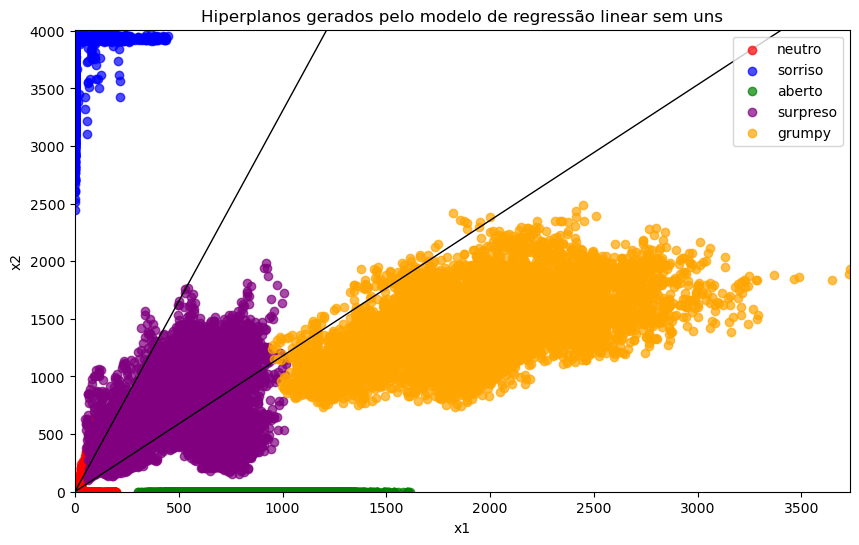

In [15]:
x1_range = np.linspace(inputs[:, 0].min() - 1, inputs[:, 0].max() + 1, 100)
x2_range = np.linspace(inputs[:, 1].min() - 1, inputs[:, 1].max() + 1, 100)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

coeficientes = modelo.coef.T
bias = modelo.bias.T

hiperplanos = np.empty((len(x1_range), len(x2_range), coeficientes.shape[0]))
for i in range(coeficientes.shape[0]):
    hiperplanos[:, :, i] = coeficientes[i, 0] * x1_mesh + coeficientes[i, 1] * x2_mesh + bias.T[i]

rotulos = ['neutro', 'sorriso', 'aberto', 'surpreso', 'grumpy']

plt.figure(figsize=(10, 6))

for i, rotulo in enumerate(rotulos):
    plt.scatter(inputs[outputs[:, i] == 1, 0], inputs[outputs[:, i] == 1, 1], c=cores[i], label=rotulo, alpha=0.7)

for i in range(coeficientes.shape[0]):
    plt.contour(x1_mesh, x2_mesh, hiperplanos[:, :, i], levels=[0], colors='black', linewidths=1)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Hiperplanos gerados pelo modelo de regressão linear sem uns')
plt.legend()
plt.show()


# <font color=ORANGE>Classificadores Bayesianos Gaussianos.

## <font color=blue> Média, desvio padrão, prob. a priori, covariância comum, discriminante

In [16]:
# separando dados de treino e teste antes de cálculo de médias, std, etc...
# se eu colocar os dados de teste, por mais que o treinamento seja separado, os parametros vão estar enviesados.
inputs_treino, inputs_teste, outputs_treino, outputs_teste = train_test_split(inputs, outputs, test_size=0.2)

indices_classes = np.argmax(outputs_treino, axis=1)
num_classes = outputs.shape[1]
vetor_medias = []
vetor_std = []

covariancia_comum = np.cov(inputs_treino, rowvar=False)
inversa_covariancia_comum = np.linalg.inv(covariancia_comum)


coeficientes_lineares = []
biases = []
matrizes_covariancia_classe = []

for classe in range(num_classes):
    dados_classe = inputs_treino[indices_classes == classe]
    vetor_medias.append(np.mean(dados_classe, axis=0))
    vetor_std.append(np.std(dados_classe, axis=0))
    matriz_cov_classe = np.cov(dados_classe, rowvar=False)
    matrizes_covariancia_classe.append(matriz_cov_classe)
    

    probabilidades_priori = np.sum(indices_classes == classe) / indices_classes.size

    coef_linear = inversa_covariancia_comum @ vetor_medias[classe]
    bias = (-0.5) * np.log(np.linalg.det(covariancia_comum)) + np.log(probabilidades_priori) - 0.5 * (vetor_medias[classe] @ inversa_covariancia_comum @ vetor_medias[classe])
    
    coeficientes_lineares.append(coef_linear)
    biases.append(bias)

    print(f'\033[33mClasse {rotulos[classe]}:\033[0m')
    print(f'\033[33mMédia x1:\033[0m {vetor_medias[classe][0]}')
    print(f'\033[33mMédia x2:\033[0m {vetor_medias[classe][1]}')
    print(f'\033[33mDesvio padrão x1:\033[0m {vetor_std[classe][0]}')
    print(f'\033[33mDesvio padrão x2:\033[0m {vetor_std[classe][1]}')
    print(f'\033[33mProbabilidade a priori:\033[0m {probabilidades_priori}')
    print(f'\033[33mMatriz de covariância de classe:\033[0m\n {matrizes_covariancia_classe[classe]}')
    print(f'\033[33mMatriz de covariância comum:\033[0m\n {covariancia_comum}')
    print(f'\033[33mFunção discriminante cov comum gi(xn):\033[0m\n {coeficientes_lineares[classe]}x + {biases[classe]}\n')


Classe neutro:
Média x1: 15.056089943785134
Média x2: 3.095940037476577
Desvio padrão x1: 31.327186381364864
Desvio padrão x2: 35.951970733629246
Probabilidade a priori: 0.200125
Matriz de covariância de classe:
 [[ 981.51521934  162.18527273]
 [ 162.18527273 1292.70568691]]
Matriz de covariância comum:
 [[ 569467.52565858 -138770.1960571 ]
 [-138770.1960571  2113516.79272676]]
Função discriminante cov comum gi(xn):
 [2.72315492e-05 3.25280948e-06]x + -15.509118935358797

Classe sorriso:
Média x1: 11.699395008822789
Média x2: 3895.507940509201
Desvio padrão x1: 48.96223015742659
Desvio padrão x2: 166.68082592563255
Probabilidade a priori: 0.19835
Matriz de covariância de classe:
 [[ 2397.60217536   395.94837238]
 [  395.94837238 27785.99987391]]
Matriz de covariância comum:
 [[ 569467.52565858 -138770.1960571 ]
 [-138770.1960571  2113516.79272676]]
Função discriminante cov comum gi(xn):
 [0.00047733 0.00187448]x + -19.171637431170183

Classe aberto:
Média x1: 849.7621425895867
Média x2

## <font color=blue> Gráfico para facilitar análise

c:\Users\heito\anaconda3\envs\base-copia\lib\site-packages\scipy\stats\_distn_infrastructure.py:1870: RuntimeWarning:

divide by zero encountered in divide

c:\Users\heito\anaconda3\envs\base-copia\lib\site-packages\scipy\stats\_distn_infrastructure.py:1870: RuntimeWarning:

invalid value encountered in divide



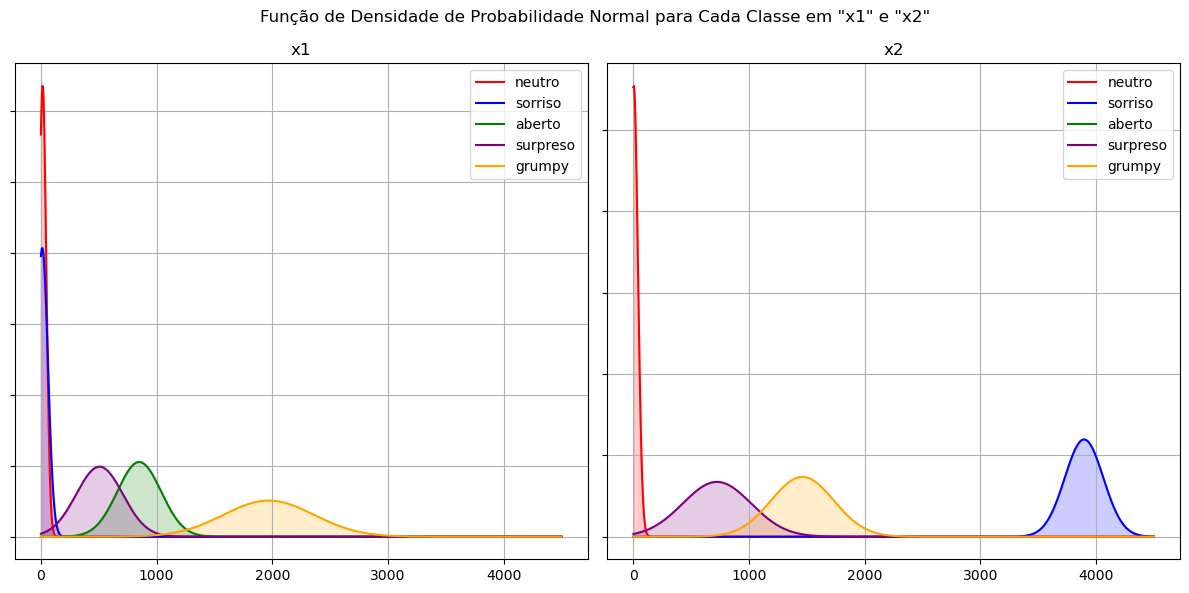

In [17]:
parametros_classes_x1 = []
parametros_classes_x2 = []
for classe in range(num_classes):
    parametros_classes_x1.append({"media": vetor_medias[classe][0], "std": vetor_std[classe][0]})
    parametros_classes_x2.append({"media": vetor_medias[classe][1], "std": vetor_std[classe][1]})

x = np.linspace(0, 4500, 1000)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for i in range(num_classes):
    for j, parametros_classe, ax in zip(range(2), [parametros_classes_x1, parametros_classes_x2], axs):
        media = parametros_classe[i]["media"]
        std = parametros_classe[i]["std"]
        cor = cores[i]

        
        y = norm.pdf(x, media, std)

        ax.plot(x, y, color=cor, label=rotulos[i])
        ax.fill_between(x, y, color=cor, alpha=0.2)
        ax.legend()
        ax.grid(True)
        ax.set_yticklabels([])

axs[0].set_title("x1")
axs[1].set_title("x2")
plt.suptitle('Função de Densidade de Probabilidade Normal para Cada Classe em "x1" e "x2"')
plt.tight_layout()
plt.show()


## <font color=blue> Resultados(covariancia comum)

In [18]:
corretos = 0
total = inputs_teste.shape[0]

for x_teste, y_teste in zip(inputs_teste, outputs_teste):
    discriminantes = [coef_linear @ x_teste + bias for coef_linear, bias in zip(coeficientes_lineares, biases)]
    classe_predita = np.argmax(discriminantes)
    if np.argmax(y_teste) == classe_predita:
        corretos += 1

acuracia = corretos / total * 100
print(f'Acurácia do modelo: {acuracia} %')


Acurácia do modelo: 94.89 %


## <font color=blue> Agregada(pooled) - resultado e análise

In [19]:
Sw_pooled = np.zeros((inputs_treino.shape[1], inputs_treino.shape[1]))
probabilidades_priori = np.ones(num_classes) / num_classes

for classe in range(num_classes):
    dados_classe = inputs_treino[indices_classes == classe]
    matriz_cov_classe = matrizes_covariancia_classe[classe]
    Sw_pooled += (dados_classe.shape[0] - 1) * matriz_cov_classe

Sw_pooled /= (inputs_treino.shape[0] - num_classes)
inversa_covariancia_pooled = np.linalg.inv(Sw_pooled)

coeficientes_lineares_pooled = []
biases_pooled = []
    # calculando os coeficientes lineares e os biases para cada classe
for classe in range(num_classes):
    coef_linear_pooled = inversa_covariancia_pooled @ vetor_medias[classe]
    bias_pooled = (-0.5) * np.log(np.linalg.det(Sw_pooled)) + np.log(probabilidades_priori[classe]) - 0.5 * (vetor_medias[classe] @ inversa_covariancia_pooled @ vetor_medias[classe])
    coeficientes_lineares_pooled.append(coef_linear_pooled)
    biases_pooled.append(bias_pooled)

    print(f'\033[33mClasse {rotulos[classe]} (pooled):\033[0m')
    print(f'\033[33mProbabilidade a priori:\033[0m {probabilidades_priori[classe]}')
    print(f'\033[33mMatriz de covariância (pooled):\033[0m\n {matrizes_covariancia_classe[classe]}')
    print(f'\033[33mFunção discriminante (pooled) gi(xn):\033[0m\n {coeficientes_lineares_pooled[classe]}x + {biases_pooled[classe]}\n')

Classe neutro (pooled):
Probabilidade a priori: 0.2
Matriz de covariância (pooled):
 [[ 981.51521934  162.18527273]
 [ 162.18527273 1292.70568691]]
Função discriminante (pooled) gi(xn):
 [ 3.43003303e-04 -6.13073779e-05]x + -12.184987751988846

Classe sorriso (pooled):
Probabilidade a priori: 0.2
Matriz de covariância (pooled):
 [[ 2397.60217536   395.94837238]
 [  395.94837238 27785.99987391]]
Função discriminante (pooled) gi(xn):
 [-0.04009127  0.11912614]x + -243.97638456644282

Classe aberto (pooled):
Probabilidade a priori: 0.2
Matriz de covariância (pooled):
 [[35795.7359992     0.       ]
 [    0.            0.       ]]
Função discriminante (pooled) gi(xn):
 [ 0.0211704  -0.00880905]x + -21.1774046626608

Classe surpreso (pooled):
Probabilidade a priori: 0.2
Matriz de covariância (pooled):
 [[40728.61033939 22156.73103344]
 [22156.73103344 87464.83961827]]
Função discriminante (pooled) gi(xn):
 [0.00513968 0.01685594]x + -19.57238711816796

Classe grumpy (pooled):
Probabilidade 

In [20]:
# calcular a predição do modelo para cada entrada no conjunto de teste
predicoes = []
for entrada in inputs_teste:
    pontuacoes = []
    for classe in range(num_classes):
        coef_linear = coeficientes_lineares_pooled[classe]
        bias = biases_pooled[classe]
        pontuacao = coef_linear @ entrada + bias
        pontuacoes.append(pontuacao)
    classe_predita = np.argmax(pontuacoes)
    predicoes.append(classe_predita)

# comparar as predições com os rótulos reais e calcular a acurácia
acuracia = np.sum(predicoes == np.argmax(outputs_teste, axis=1)) / inputs_teste.shape[0]
print(f'Acurácia do modelo: {acuracia}')


Acurácia do modelo: 0.9637


In [21]:
acuracias = []
for i in range(100):
    inputs_treino, inputs_teste, outputs_treino, outputs_teste = train_test_split(inputs, outputs, test_size=0.2)
    predicoes = []
    for entrada, rotulo_real in zip(inputs_teste, outputs_teste):
        pontuacoes = []
        for classe in range(num_classes):
            coef_linear = coeficientes_lineares_pooled[classe]
            bias = biases_pooled[classe]
            pontuacao = coef_linear @ entrada + bias
            pontuacoes.append(pontuacao)
        classe_predita = np.argmax(pontuacoes)
        predicoes.append(classe_predita)

    predicoes = np.array(predicoes)
    rotulos_reais = np.argmax(outputs_teste, axis=1)

    acertos = np.sum(predicoes == rotulos_reais)
    acuracia = acertos / len(inputs_teste)
    acuracias.append(acuracia)

media = np.mean(acuracias)
desvio_padrao = np.std(acuracias)
maior_acuracia = np.max(acuracias)
menor_acuracia = np.min(acuracias)

print(f'Média de acurácia: {media*100:.2f}%')
print(f'Desvio padrão de acurácia: {desvio_padrao*100:.2f}%')
print(f'Maior acurácia: {maior_acuracia*100:.2f}%')
print(f'Menor acurácia: {menor_acuracia*100:.2f}%')


Média de acurácia: 96.26%
Desvio padrão de acurácia: 0.15%
Maior acurácia: 96.66%
Menor acurácia: 95.99%


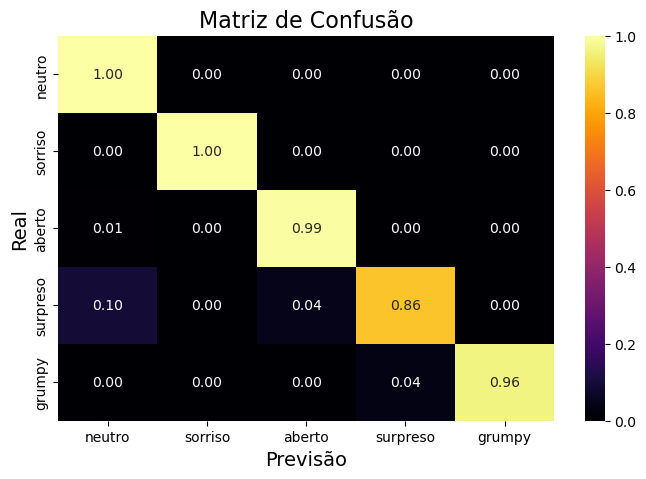

In [22]:
rotulos_reais = np.argmax(outputs_teste, axis=1)
rotulos_previstos = []

for x_teste in inputs_teste:
    discriminantes_pooled = [coef_linear @ x_teste + bias for coef_linear, bias in zip(coeficientes_lineares_pooled, biases_pooled)]
    classe_predita_pooled = np.argmax(discriminantes_pooled)
    rotulos_previstos.append(classe_predita_pooled)

rotulos_previstos = np.array(rotulos_previstos)

matriz_confusao = confusion_matrix(rotulos_reais, rotulos_previstos)
matriz_confusao_norm = matriz_confusao / matriz_confusao.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 5))
sns.heatmap(matriz_confusao_norm, annot=True, fmt='.2f', cmap='inferno', vmin=0, vmax=1, xticklabels=rotulos, yticklabels=rotulos)
plt.xlabel('Previsão', fontsize=14)
plt.ylabel('Real', fontsize=14)
plt.title("Matriz de Confusão", fontsize=16)
plt.show()


## <font color=blue> Friedman - resultado e análise

### <font color=red> Friedman - modificando matriz de cov. e testando cada lambda

In [23]:
epsilon = 1e-6
resultados = {}
n = inputs_teste.shape[0]
for lambda_ in lambdas:
    print(f'\033[33mLambda:\033[0m {lambda_}')
    
    coeficientes_lineares_friedman = []
    biases_friedman = []

    for classe in range(num_classes):
        dados_classe = inputs_treino[indices_classes == classe]
        ni = dados_classe.shape[0]

        if lambda_ == 0:
            matriz_cov_friedman = matrizes_covariancia_classe[classe]
        elif lambda_ == 1:
            matriz_cov_friedman = Sw_pooled
        else:
            matriz_cov_friedman = ((1 - lambda_) * ni * matrizes_covariancia_classe[classe] + lambda_ * n * Sw_pooled) / ((1 - lambda_) * ni + lambda_ * n)

        inversa_covariancia_friedman = np.linalg.inv(matriz_cov_friedman + epsilon * np.identity(matriz_cov_friedman.shape[0]))

        coef_linear_friedman = inversa_covariancia_friedman @ vetor_medias[classe]
        bias_friedman = (-0.5) * np.log(np.linalg.det(matriz_cov_friedman + epsilon * np.identity(matriz_cov_friedman.shape[0]))) + np.log(probabilidades_priori[classe]) - 0.5 * (vetor_medias[classe] @ inversa_covariancia_friedman @ vetor_medias[classe])

        coeficientes_lineares_friedman.append(coef_linear_friedman)
        biases_friedman.append(bias_friedman)
        
        print(f'\033[33mClasse {rotulos[classe]} (Friedman):\033[0m')
        print(f'\033[33mMatriz de covariância (Friedman):\033[0m\n {matriz_cov_friedman}')
        print(f'\033[33mFunção discriminante (Friedman) gi(xn):\033[0m\n {coef_linear_friedman}x + {bias_friedman}\n')

    resultados[lambda_] = {'coeficientes': coeficientes_lineares_friedman, 'biases': biases_friedman}


Lambda: 0
Classe neutro (Friedman):
Matriz de covariância (Friedman):
 [[ 981.51521934  162.18527273]
 [ 162.18527273 1292.70568691]]
Função discriminante (Friedman) gi(xn):
 [0.01526027 0.00048035]x + -8.741381986797103

Classe sorriso (Friedman):
Matriz de covariância (Friedman):
 [[ 2397.60217536   395.94837238]
 [  395.94837238 27785.99987391]]
Função discriminante (Friedman) gi(xn):
 [-0.01831607  0.14045779]x + -284.0855920709312

Classe aberto (Friedman):
Matriz de covariância (Friedman):
 [[35795.7359992     0.       ]
 [    0.            0.       ]]
Função discriminante (Friedman) gi(xn):
 [0.0237392 0.       ]x + -10.030811468261392

Classe surpreso (Friedman):
Matriz de covariância (Friedman):
 [[40728.61033939 22156.73103344]
 [22156.73103344 87464.83961827]]
Função discriminante (Friedman) gi(xn):
 [0.00922308 0.00592157]x + -17.007996746818527

Classe grumpy (Friedman):
Matriz de covariância (Friedman):
 [[152878.67685869  56091.6965979 ]
 [ 56091.6965979   73313.83210859

In [24]:
acuracias_treino = []
acuracias_teste = []

for lambda_ in lambdas:
    coeficientes_lineares_friedman = resultados[lambda_]['coeficientes']
    biases_friedman = resultados[lambda_]['biases']
    
    # Acurácia no conjunto de treino
    predicoes_treino = []
    for entrada in inputs_treino:
        pontuacoes = []
        for classe in range(num_classes):
            coef_linear = coeficientes_lineares_friedman[classe]
            bias = biases_friedman[classe]
            pontuacao = coef_linear @ entrada + bias
            pontuacoes.append(pontuacao)
        classe_predita = np.argmax(pontuacoes)
        predicoes_treino.append(classe_predita)

    acuracia_treino = np.sum(predicoes_treino == np.argmax(outputs_treino, axis=1)) / inputs_treino.shape[0]
    acuracias_treino.append(acuracia_treino)

    # Acurácia no conjunto de teste
    predicoes_teste = []
    for entrada in inputs_teste:
        pontuacoes = []
        for classe in range(num_classes):
            coef_linear = coeficientes_lineares_friedman[classe]
            bias = biases_friedman[classe]
            pontuacao = coef_linear @ entrada + bias
            pontuacoes.append(pontuacao)
        classe_predita = np.argmax(pontuacoes)
        predicoes_teste.append(classe_predita)

    acuracia_teste = np.sum(predicoes_teste == np.argmax(outputs_teste, axis=1)) / inputs_teste.shape[0]
    acuracias_teste.append(acuracia_teste)

df_acuracias = pd.DataFrame(data={"Lambda": lambdas, "Acurácia treino": acuracias_treino, "Acurácia teste": acuracias_teste})
df_acuracias.style.highlight_max(subset=["Acurácia treino", "Acurácia teste"], color="blue", axis=0)


,Lambda,Acurácia treino,Acurácia teste
0,0.000000,0.598800,0.598300
1,0.100000,0.743150,0.741600
2,0.200000,0.779400,0.779800
3,0.300000,0.820350,0.820000
4,0.400000,0.863400,0.864200
5,0.500000,0.904925,0.903600
6,0.600000,0.929700,0.929600
7,0.700000,0.944300,0.944900
8,0.900000,0.958875,0.958400
9,1.000000,0.962625,0.962400


### <font color=red> Friedman - resultado com lambda 1 e matriz de confusão

In [25]:
melhor_lambda = 1
coeficientes_melhor_lambda = resultados[melhor_lambda]['coeficientes']
biases_melhor_lambda = resultados[melhor_lambda]['biases']

acuracias = []
for i in range(100):
    inputs_treino, inputs_teste, outputs_treino, outputs_teste = train_test_split(inputs, outputs, test_size=0.2)
    acertos = 0
    for input_teste, output_teste in zip(inputs_teste, outputs_teste):
        discriminantes = []
        for classe in range(num_classes):
            coef = coeficientes_melhor_lambda[classe]
            bias = biases_melhor_lambda[classe]
            discriminante = coef @ input_teste + bias
            discriminantes.append(discriminante)
        classe_prevista = np.argmax(discriminantes)
        classe_real = np.argmax(output_teste)
        if classe_prevista == classe_real:
            acertos += 1
    acuracia = acertos / len(inputs_teste)
    acuracias.append(acuracia)

media = np.mean(acuracias)
desvio_padrao = np.std(acuracias)
maior_acuracia = np.max(acuracias)
menor_acuracia = np.min(acuracias)

print(f'Média de acurácia: {media*100:.2f}%')
print(f'Desvio padrão de acurácia: {desvio_padrao*100:.2f}%')
print(f'Maior acurácia: {maior_acuracia*100:.2f}%')
print(f'Menor acurácia: {menor_acuracia*100:.2f}%')


Média de acurácia: 96.25%
Desvio padrão de acurácia: 0.17%
Maior acurácia: 96.69%
Menor acurácia: 95.84%


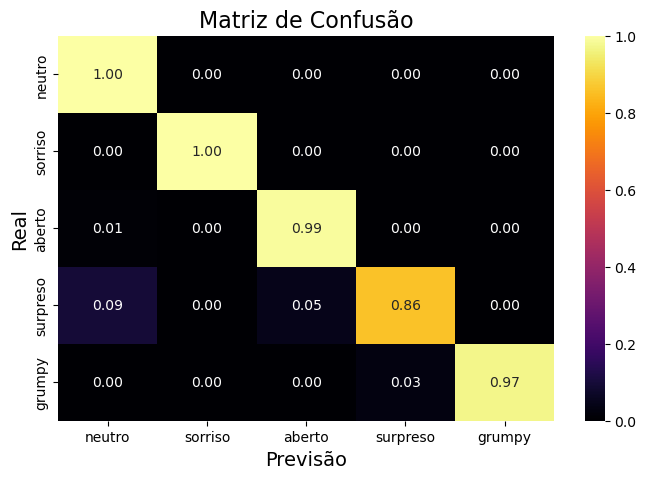

In [28]:
previsoes = []

for input_teste in inputs_teste:
    g_xn = []

    for classe in range(num_classes):
        coef = coeficientes_melhor_lambda[classe]
        bias = biases_melhor_lambda[classe]
        g = coef @ input_teste + bias
        g_xn.append(g)

    previsao = np.argmax(g_xn)
    previsoes.append(previsao)

matriz_confusao = confusion_matrix(np.argmax(outputs_teste, axis=1), previsoes)

matriz_confusao_norm = matriz_confusao / matriz_confusao.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 5))
sns.heatmap(matriz_confusao_norm, annot=True, fmt='.2f', cmap='inferno', vmin=0, vmax=1, xticklabels=rotulos, yticklabels=rotulos)
plt.xlabel('Previsão', fontsize=14)
plt.ylabel('Real', fontsize=14)
plt.title("Matriz de Confusão", fontsize=16)
plt.show()


## <font color=blue> Naive Bayes - resultado e análise

In [29]:
inputs_treino, inputs_teste, outputs_treino, outputs_teste = train_test_split(inputs, outputs, test_size=0.2)

medias = []
covariancias = []
epsilon = 1e-5
num_classes = outputs.shape[1]
classes, counts = np.unique(outputs_treino.argmax(axis=1), return_counts=True)
for classe in classes:
    indices = np.where(outputs_treino.argmax(axis=1) == classe)
    X_classe = inputs_treino[indices]
    media = np.mean(X_classe, axis=0)
    cov = np.cov(X_classe.T)
    cov += epsilon * np.eye(cov.shape[0])  
    medias.append(media)
    covariancias.append(cov)
    print(f'\033[33mClasse {rotulos[classe]} (Naive Bayes):\033[0m')
    print(f'\033[33mMatriz de covariância diagonal comum:\033[0m\n {cov}')


Classe neutro (Naive Bayes):
Matriz de covariância diagonal comum:
 [[ 959.38163593  160.94592462]
 [ 160.94592462 1266.98443612]]
Classe sorriso (Naive Bayes):
Matriz de covariância diagonal comum:
 [[ 2334.33521367   349.39135635]
 [  349.39135635 26266.88613521]]
Classe aberto (Naive Bayes):
Matriz de covariância diagonal comum:
 [[3.5703185e+04 0.0000000e+00]
 [0.0000000e+00 1.0000000e-05]]
Classe surpreso (Naive Bayes):
Matriz de covariância diagonal comum:
 [[41081.10541085 22112.36443668]
 [22112.36443668 87344.58761101]]
Classe grumpy (Naive Bayes):
Matriz de covariância diagonal comum:
 [[151971.43558054  56356.90801609]
 [ 56356.90801609  73485.30637087]]


In [30]:
acuracias = []
for i in range(100):
    inputs_treino, inputs_teste, outputs_treino, outputs_teste = train_test_split(inputs, outputs, test_size=0.2)
    corretos = 0
    total = 0
    for x, y_true in zip(inputs_teste, outputs_teste):
        discriminantes = []
        for media, cov in zip(medias, covariancias):
            cov_inv = np.linalg.inv(cov)
            disc = -0.5 * (x - media).T @ cov_inv @ (x - media)
            discriminantes.append(disc)
        predicao = np.argmax(discriminantes)
        if y_true[predicao] == 1:
            corretos += 1
        total += 1
    acuracia = corretos / total
    acuracias.append(acuracia)

media = sum(acuracias) / len(acuracias)
desvio_padrao = (sum((x - media) ** 2 for x in acuracias) / len(acuracias)) ** 0.5
maior_acuracia = max(acuracias)
menor_acuracia = min(acuracias)

print(f'Média de acurácia: {media*100}%')
print(f'Desvio padrão de acurácia: {desvio_padrao*100}%')
print(f'Maior acurácia: {maior_acuracia*100}%')
print(f'Menor acurácia: {menor_acuracia*100}%')


Média de acurácia: 99.20449999999998%
Desvio padrão de acurácia: 0.07989211475483643%
Maior acurácia: 99.42%
Menor acurácia: 99.03999999999999%


In [31]:
corretos = 0
total = 0
for x, y_true in zip(inputs_teste, outputs_teste):
    discriminantes = []
    for media, cov in zip(medias, covariancias):
        cov_inv = np.linalg.inv(cov)
        disc = -0.5 * np.dot((x - media).T, np.dot(cov_inv, (x - media)))
        discriminantes.append(disc)
    predicao = np.argmax(discriminantes)
    if y_true[predicao] == 1:
        corretos += 1
    total += 1

acuracia = corretos / total
print(f'Acurácia: {acuracia*100}%')

Acurácia: 99.2%


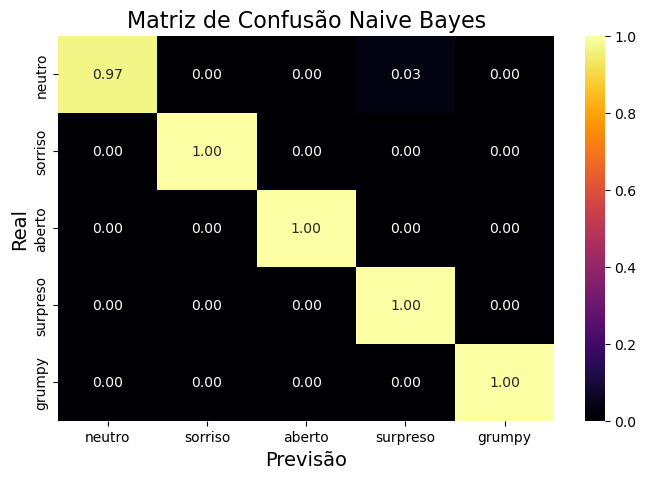

In [32]:
previsoes = []
for x in inputs_teste:
    discriminantes = []
    for media, cov in zip(medias, covariancias):
        cov_inv = np.linalg.inv(cov)
        disc = -0.5 * np.dot((x - media).T, np.dot(cov_inv, (x - media)))
        discriminantes.append(disc)
    predicao = np.argmax(discriminantes)
    previsoes.append(predicao)

matriz_confusao = confusion_matrix(outputs_teste.argmax(axis=1), previsoes)
matriz_confusao_norm = matriz_confusao / matriz_confusao.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 5))
sns.heatmap(matriz_confusao_norm, annot=True, fmt='.2f', cmap='inferno', vmin=0, vmax=1, xticklabels=rotulos, yticklabels=rotulos)
plt.xlabel('Previsão', fontsize=14)
plt.ylabel('Real', fontsize=14)
plt.title("Matriz de Confusão Naive Bayes", fontsize=16)
plt.show()


## <font color=blue>Questões

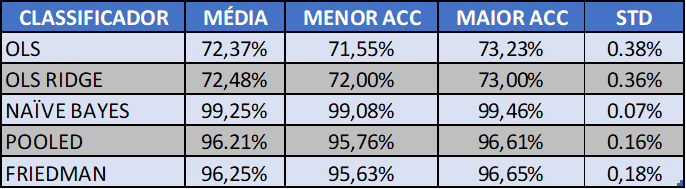